1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


[2.94966877e+01 1.92270442e-16 2.15035569e+00] [2.94966877e+01 2.15035569e+00 8.03385034e-17]
[ 93.20519247 100.         100.        ]


<IPython.core.display.Javascript object>


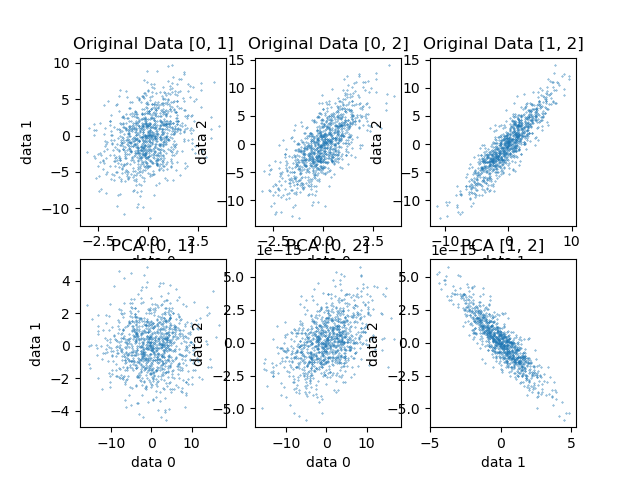

Text(0.5, 1.0, 'PCA [1, 2]')

In [36]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition

N = 1000
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2 * x1 + x2
x = np.stack([x1, x2, x3]).T
cov = np.cov(x, rowvar=False)
w, v = np.linalg.eig(cov)
u, s, vh = np.linalg.svd(cov, full_matrices=True)
print(w, s) # values are just permuted
# We just need  x1 and x2 to explain almost 100% of the dataset variance

l, principal_axes = np.linalg.eig(np.cov(x - x.mean(0), rowvar=False))
idx = l.argsort()[::-1]
l, principal_axes = l[idx], principal_axes[:, idx]
perc = l.cumsum() / l.sum() * 100
print(perc)

k = 3
principal_components = (x - x.mean(0)).dot(principal_axes[:, :k])
fig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(x[:, 0], x[:, 1], s=0.1)
axs[0, 0].set_xlabel('data 0')
axs[0, 0].set_ylabel('data 1')
axs[0, 0].set_title('Original Data [0, 1]')

axs[0, 1].scatter(x[:, 0], x[:, 2], s=0.1)
axs[0, 1].set_xlabel('data 0')
axs[0, 1].set_ylabel('data 2')
axs[0, 1].set_title('Original Data [0, 2]')

axs[0, 2].scatter(x[:, 1], x[:, 2], s=0.1)
axs[0, 2].set_xlabel('data 1')
axs[0, 2].set_ylabel('data 2')
axs[0, 2].set_title('Original Data [1, 2]')

axs[1, 0].scatter(principal_components[:, 0], principal_components[:, 1], s=0.1)
axs[1, 0].set_xlabel('data 0')
axs[1, 0].set_ylabel('data 1')
axs[1, 0].set_title('PCA [0, 1]')

axs[1, 1].scatter(principal_components[:, 0], principal_components[:, 2], s=0.1)
axs[1, 1].set_xlabel('data 0')
axs[1, 1].set_ylabel('data 2')
axs[1, 1].set_title('PCA [0, 2]')

axs[1, 2].scatter(principal_components[:, 1], principal_components[:, 2], s=0.1)
axs[1, 2].set_xlabel('data 1')
axs[1, 2].set_ylabel('data 2')
axs[1, 2].set_title('PCA [1, 2]')


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

[2.55731804e+01 1.82080591e+00 3.99608837e-16 3.34886262e-04
 3.49275820e-04 4.61329314e-04 3.67504656e-04 3.72202200e-04
 4.47311673e-04 3.99814134e-04 4.08172469e-04 4.31528005e-04
 4.18909654e-04] [2.55731804e+01 1.82080591e+00 4.61329314e-04 4.47311673e-04
 4.31528005e-04 4.18909654e-04 4.08172469e-04 3.99814134e-04
 3.72202200e-04 3.67504656e-04 3.49275820e-04 3.34886262e-04
 2.23073079e-15]
[ 93.33966581  99.98543347  99.98711728  99.98874992  99.99032496
  99.99185394  99.99334373  99.99480301  99.99616152  99.99750287
  99.9987777  100.         100.        ]


<IPython.core.display.Javascript object>


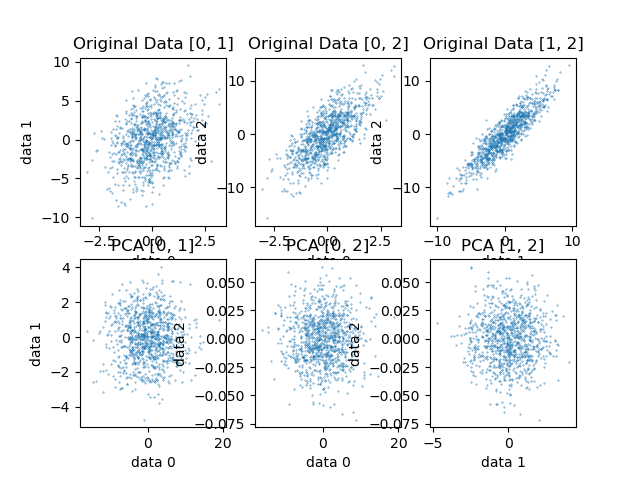

Text(0.5, 1.0, 'PCA [1, 2]')

In [37]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition

N = 1000
x_noise = np.random.normal(0, 1. / 50., (N, 10))
x1 = np.random.normal(0, 1, N) + x_noise.sum(-1)
x2 = x1 + np.random.normal(0, 3, N) + x_noise.sum(-1)
x3 = 2 * x1 + x2
x = np.concatenate([np.stack([x1, x2, x3]).T, x_noise], -1)
cov = np.cov(x, rowvar=False)
w, v = np.linalg.eig(cov)
u, s, vh = np.linalg.svd(cov, full_matrices=True)
print(w, s) # values are just permuted
# We just need  x1 and x2 to explain almost 100% of the dataset variance

k = 3
l, principal_axes = np.linalg.eig(np.cov(x - x.mean(0), rowvar=False))
idx = l.argsort()[::-1]
l, principal_axes = l[idx], principal_axes[:, idx]
perc = l.cumsum() / l.sum() * 100
print(perc)

principal_components = (x - x.mean(0)).dot(principal_axes[:, :k])
fig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(x[:, 0], x[:, 1], s=0.1)
axs[0, 0].set_xlabel('data 0')
axs[0, 0].set_ylabel('data 1')
axs[0, 0].set_title('Original Data [0, 1]')

axs[0, 1].scatter(x[:, 0], x[:, 2], s=0.1)
axs[0, 1].set_xlabel('data 0')
axs[0, 1].set_ylabel('data 2')
axs[0, 1].set_title('Original Data [0, 2]')

axs[0, 2].scatter(x[:, 1], x[:, 2], s=0.1)
axs[0, 2].set_xlabel('data 1')
axs[0, 2].set_ylabel('data 2')
axs[0, 2].set_title('Original Data [1, 2]')

axs[1, 0].scatter(principal_components[:, 0], principal_components[:, 1], s=0.1)
axs[1, 0].set_xlabel('data 0')
axs[1, 0].set_ylabel('data 1')
axs[1, 0].set_title('PCA [0, 1]')

axs[1, 1].scatter(principal_components[:, 0], principal_components[:, 2], s=0.1)
axs[1, 1].set_xlabel('data 0')
axs[1, 1].set_ylabel('data 2')
axs[1, 1].set_title('PCA [0, 2]')

axs[1, 2].scatter(principal_components[:, 1], principal_components[:, 2], s=0.1)
axs[1, 2].set_xlabel('data 1')
axs[1, 2].set_ylabel('data 2')
axs[1, 2].set_title('PCA [1, 2]')

# Now the variance explained by the first 3 components decreased, as expected, due to the introduction of 
# 10 others sources of variance.   

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


(20, 1000, 3)


<IPython.core.display.Javascript object>


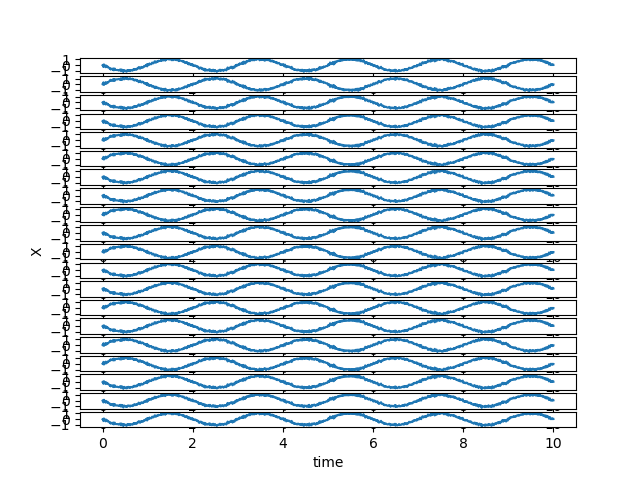

/home/giacomo/Programs/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/giacomo/Programs/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/giacomo/Programs/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'X')

In [10]:
# x = A sin(2πft).
%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as R

N = 1000
t = np.linspace(0, 10, N)
x = np.stack([np.sin(np.pi * t) + np.random.normal(0, 0.1, N), np.zeros_like(t), np.zeros_like(t)]).T

num_views = 20

# Get a batch of viewing cameras. 
axis = np.random.standard_normal((num_views, 3))
axis /= np.linalg.norm(axis, axis=-1)[:, None]
axis *= np.random.uniform(0, 2*np.pi)

r = R.from_rotvec(axis)
cameras_record = np.transpose(np.stack([r.apply(x[i]) for i in range(x.shape[0])]), (1, 0, 2))
print(cameras_record.shape)
k = 1
fig, ax = plt.subplots(20, 1)
for i, X in enumerate(cameras_record):
    l, principal_axes = np.linalg.eig(np.cov(X - X.mean(0), rowvar=False))
    idx = l.argsort()[::-1]
    l, principal_axes = l[idx], principal_axes[:, idx]
    perc = l.cumsum() / l.sum() * 100
    principal_components = (X - X.mean(0)).dot(principal_axes[:, :k])
    ax[i].plot(t, principal_components[:, 0])
ax[-1].set_xlabel('time')
ax[-10].set_ylabel('X')


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [122]:
# get the dataset and its description on the proper data directory
import os
import pandas as pd

if not os.path.exists('data/magic04.data'):
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
if not os.path.exists('data/magic04.names'):
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

df = pd.read_csv('data/magic04.data', names=
                 ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
                  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class_hg'])
for i in range(len(df['class_hg'].unique())):
    k = df['class_hg'].unique()[i]
    df.loc[df.class_hg == k, 'class_hg'] = i
    
print(df['class_hg'].unique())
k = -1
X = df.to_numpy(dtype=np.float32)
l, principal_axes = np.linalg.eig(np.cov(X - X.mean(0), rowvar=False))
idx = l.argsort()[::-1]
l, principal_axes = l[idx], principal_axes[:, idx]
perc = l.cumsum() / l.sum() * 100
principal_components = (X - X.mean(0)).dot(principal_axes[:, :k])
print(perc)


[0 1]
[ 44.04664995  69.84540919  83.34354194  92.22526645  96.31025615
  99.21286722  99.99830543  99.99934869  99.99992651  99.99999743
 100.        ]
